# 다항회귀

## 다항식 특성으로 변환

In [9]:
# sampel [[0,1][2, 3]] 변환 연습
import numpy as np
np.arange(2,4,0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
       3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9])

In [33]:
# np.arange(4).reshape(2,2)
X = np.arange(4).reshape(-1,2)
print(X)

[[0 1]
 [2 3]]


In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

In [35]:
poly.fit(X)
x_poly = poly.transform(X)
print(x_poly)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [36]:
print(poly.fit_transform(X))

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [37]:
poly.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

## 사이킷런으로 다항 회귀 분석

In [ ]:
#1) 데이터 준비: 데이터를 생성하여 탐색 및 확인

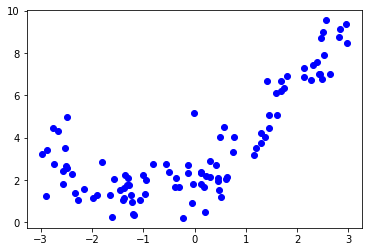

In [38]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(100,1)-3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100,1)

plt.scatter(X,y, color = 'blue')
plt.show()

In [ ]:
# 2) 단순 선형 회귀 분석 및 시각화 : 비교 목적

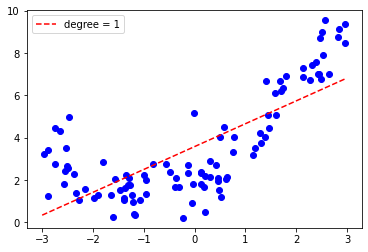

In [40]:
from sklearn.linear_model import LinearRegression

X1_train = X
y_train = y

reg1 = LinearRegression().fit(X1_train, y_train)

xx = np.arange(-3,3,0.01)[:, np.newaxis]
yy = reg1.predict(xx)
plt.plot(xx, yy, color ='r', linestyle = '--', label = 'degree = 1')
plt.scatter(X,y, color = 'b')
plt.legend()
plt.show()

In [41]:
# 3) 2차항 형태로 다항 회귀 수행

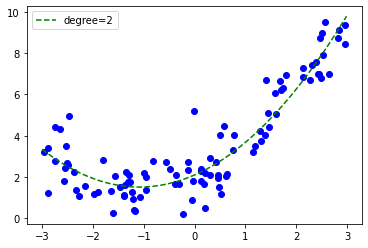

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

X2_train = poly.fit_transform(X)
y_train = y

reg2 = LinearRegression().fit(X2_train, y_train)
xx = np.arange(-3,3,0.01)
yy = reg2.predict(poly.transform(xx[:,np.newaxis]))

plt.plot(xx,yy,color='g', linestyle='--', label='degree=2')
plt.scatter(X,y,color='b')
plt.legend()
plt.show()

In [44]:
# 구해진 2차식의 계수 확인

In [47]:
reg2.coef_,reg2.intercept_

(array([[0.        , 1.08392383, 0.4991387 ]]), array([2.09425984]))

In [48]:
# 4) 7차항 형태로 다항회귀 수행

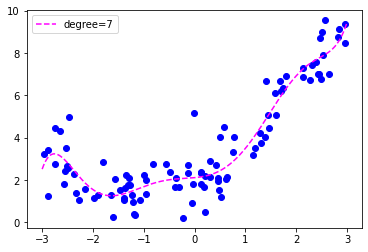

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 7)

X7_train = poly.fit_transform(X)
y_train = y

reg7 = LinearRegression().fit(X7_train,y_train)

xx = np.arange(-3,3,0.01)
yy = reg7.predict(poly.transform(xx[:,np.newaxis]))

plt.plot(xx,yy,color ='magenta', linestyle='--', label = 'degree=7')
plt.scatter(X,y,color = 'b')
plt.legend()
plt.show()

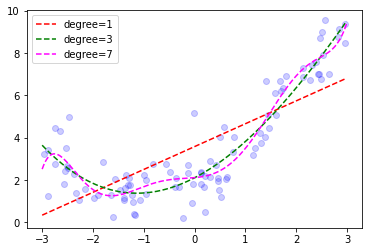

In [62]:
# 여러 형태의 시각화 그래프 비교

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1,3,7]
colors = ['red','green','magenta']
plt.scatter(X,y,color='b',alpha=0.2)
for i,d in enumerate(degree):
    poly = PolynomialFeatures(degree = d)
    X_train = poly.fit_transform(X)
    y_train = y

    reg = LinearRegression().fit(X_train,y_train)
    xx = np.arange(-3,3,0.01)
    yy = reg.predict(poly.transform(xx[:,np.newaxis]))
    
    plt.plot(xx,yy,color =colors[i], linestyle='--', label = 'degree={}'.format(d))
    plt.legend()
plt.show()

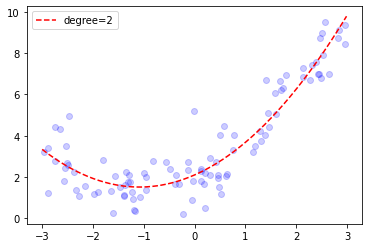

In [65]:
# degree = 2 인 모델
from sklearn.pipeline import make_pipeline

reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()).fit(X,y)
xx = np.arange(-3,3,0.01)[:,np.newaxis]
yy = reg.predict(xx)

plt.plot(xx,yy,color='r', linestyle='--',label = 'degree=2')
plt.scatter(X,y,color='b',alpha=0.2)
plt.legend()
plt.show()

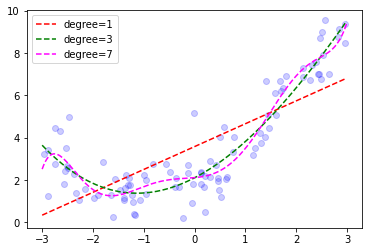

In [84]:
# 2) degree = [1,3,7] 인 모델을 파이프라인으로 변환 -추정 통합

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1,3,7]
colors = ['red','green','magenta']
plt.scatter(X,y,color='b',alpha=0.2)
for i,d in enumerate(degree):
    reg = make_pipeline(PolynomialFeatures(degree=d), LinearRegression()).fit(X,y)
    xx = np.arange(-3,3,0.01)[:,np.newaxis]
    yy = reg.predict(xx)
    
    plt.plot(xx,yy,color =colors[i], linestyle='--', label = 'degree={}'.format(d))
    plt.legend()
plt.show()

# [실습 ]: 보스턴 집값 데이터셋을 활용한 다항회귀 실습 - 방의 갯수 VS 가격

### 필요한 모듈 import

#### 데이터 수집

In [ ]:
boston = load_boston()

#### 데이터 이해

In [ ]:
#boston.DESCR
print(boston.feature_names)

#### 데이터 준비

In [ ]:
# 독립변수, 종속변수를 데이터프레임으로 정리

In [ ]:
# 데이터프레임 확인


In [ ]:
# 학습용, 검증용 데이터 분할


#### 모델 구축

In [ ]:
# 시각화를 위한 xx 좌표계 미리 준비
# y축 좌표계는 각 모델마다 만듦
# 방의 갯수 최대값, 최소값

In [ ]:
#원본 데이터 단순 회귀


In [ ]:
# 아래 셀에 있는 '???'를 지우고 본인이 작성한 코드를 입력하면 됩니다. 

In [ ]:
# 2차식의 다항회귀
X2_train = ???
X2_test = ???

reg2 = ???
y_pred2 = ???

print(reg2.coef_, reg2.intercept_)

xx2 = ???
yy2 = ???

In [ ]:
# 3차식의 다항회귀
X3_train = ???
X3_test = ???

reg3 = ???
y_pred3 = ???

print(reg3.coef_, reg3.intercept_)

xx3 = ???
yy3 = ???


####  다항 회귀 시각화

#### 모델 성능 평가

In [ ]:
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자
data = { 1 : r2_score(y_test, y_pred1),
         2 : r2_score(y_test, y_pred2),
         3 : r2_score(y_test, y_pred3) }
       
print(pd.Series(data))
